In [1]:
#pip install pyMysql

In [2]:
import pymysql

In [3]:

from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

pip install mysql-connector-python pandas sqlalchemy


In [5]:
import mysql.connector

In [6]:
mycon = pymysql.connect(host = "localhost", user = "root", password = "Root@123456789", database = 'hr')

In [7]:
if mycon.open:
    print("Connection success")
else:
    print("Unsuccessful")

Connection success


In [8]:
try:
    cu = mycon.cursor()
except:
    print("CURSOR NOT READY")
else:
    print("Cursor is ready")

Cursor is ready


In [9]:
# Task1
q1 = "select country_name, region_id from countries;"

In [10]:
try:
    cu.execute(q1)
    mycon.commit()
    s = cu.fetchmany(5)
    print(s)
except:
    mycon.rollback()
    print("Error")

(('Argentina', 2), ('Australia', 3), ('Belgium', 1), ('Brazil', 2), ('Canada', 2))


In [ ]:
# Task_2
from sqlalchemy.types import VARCHAR, Integer
from sqlalchemy import create_engine
from urllib.parse import quote_plus
import pandas as pd
import mysql.connector

hostname = "localhost"
username = "root"
pwd = "Root@123456789"
dbname = "hr"
encoded_pwd = quote_plus(pwd)
mycon = mysql.connector.connect(
    host=hostname,
    user=username,
    password=pwd,
    database=dbname
)

sqlquery = """SELECT c.country_id, c.country_name, COUNT(e.employee_id) as employee_count
              FROM employees e
              JOIN departments d ON e.department_id = d.department_id
              JOIN locations l ON d.location_id = l.location_id
              JOIN countries c ON l.country_id = c.country_id
              GROUP BY c.country_id, c.country_name"""

counts = pd.read_sql(sqlquery, mycon)

engine = create_engine(f"mysql+pymysql://{username}:{encoded_pwd}@{hostname}/{dbname}")
counts.to_sql('counts', con=engine, if_exists='replace', index=False,
              dtype={'country_id': VARCHAR(2), 'country_name': VARCHAR(40), 'employee_count': Integer})


mycon.close()
engine.dispose()


C:\Users\akshi\AppData\Local\Temp\ipykernel_9332\2734079982.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  counts = pd.read_sql(sqlquery, mycon)


C:\Users\akshi\AppData\Local\Temp\ipykernel_9332\3942283304.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employee_counts_by_location = pd.read_sql(employee_count_query, mysql_connection)


Data saved to CSV.


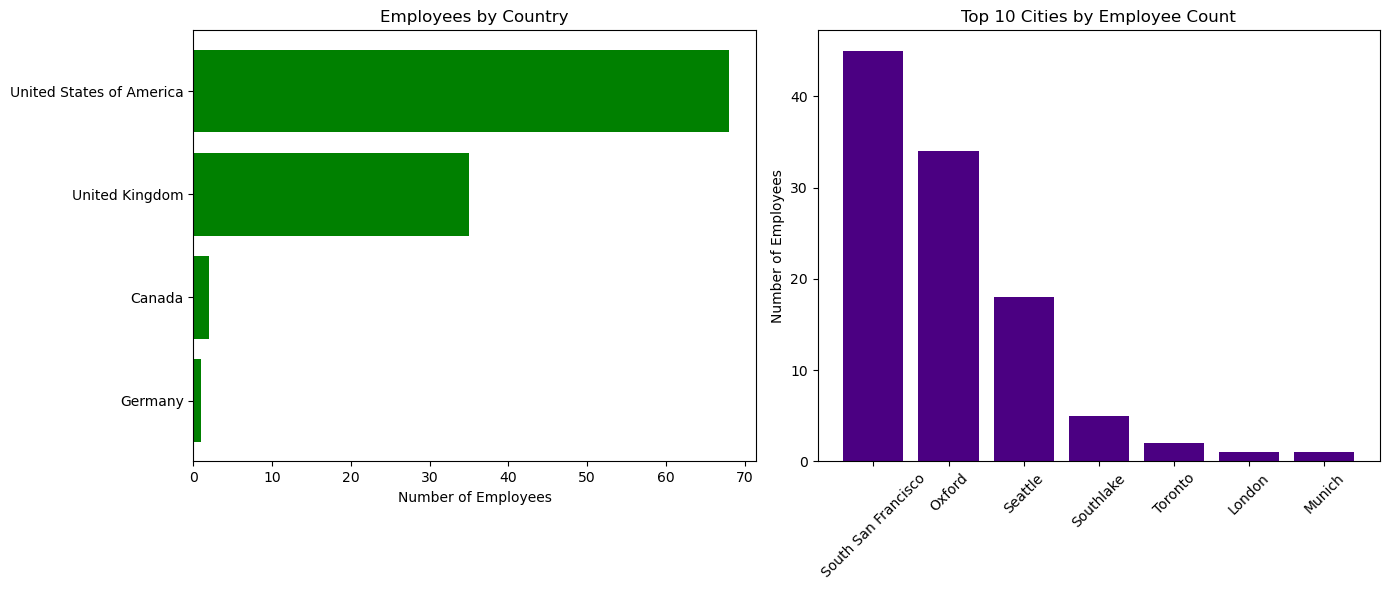

In [4]:
# Task3
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
mysql_connection = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Root@123456789',
    database='hr'
)

# Step 2: SQL query to get employee counts by country and city
employee_count_query = """
SELECT 
    c.country_name, l.city, COUNT(e.employee_id) AS employee_count
FROM 
    employees e
    JOIN departments d ON e.department_id = d.department_id
    JOIN locations l ON d.location_id = l.location_id
    JOIN countries c ON l.country_id = c.country_id
GROUP BY 
    c.country_name, l.city
ORDER BY 
    c.country_name, employee_count DESC
"""

# Step 3: Load query results into a DataFrame
employee_counts_by_location = pd.read_sql(employee_count_query, mysql_connection)
mysql_connection.close()

# Step 4: Save the data to a CSV file
csv_filename = 'employee_counts_by_country_city.csv'
employee_counts_by_location.to_csv(csv_filename, index=False)
print("Data saved to CSV.")

# Step 5: Create visualizations
plt.figure(figsize=(14, 6))

# Plot 1: Total employees per country (horizontal bar chart)
country_totals = (
    employee_counts_by_location
    .groupby('country_name', as_index=False)['employee_count']
    .sum()
    .sort_values(by='employee_count', ascending=True)
)

plt.subplot(1, 2, 1)
plt.barh(country_totals['country_name'], country_totals['employee_count'], color='green')
plt.title('Employees by Country')
plt.xlabel('Number of Employees')

# Plot 2: Top 10 cities by employee count
city_totals = (
    employee_counts_by_location
    .groupby('city', as_index=False)['employee_count']
    .sum()
    .sort_values(by='employee_count', ascending=False)
    .head(10)
)

plt.subplot(1, 2, 2)
plt.bar(city_totals['city'], city_totals['employee_count'], color='indigo')
plt.title('Top 10 Cities by Employee Count')
plt.xticks(rotation=45)
plt.ylabel('Number of Employees')

plt.tight_layout()
plt.show()



